In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
df = pd.read_csv("data/tagged category data.csv", encoding = "ISO-8859-1")
df.head()
df2 = pd.read_csv("data/tagged category data.csv", encoding = "ISO-8859-1")

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#no stop word
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [4]:
df['text'] = df['text'].map(lambda com : clean_text(com))

In [5]:
#stop word filter
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text_2(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [6]:
df2['text'] = df2['text'].map(lambda com : clean_text_2(com))

In [7]:

# a =df[df.food == 1].count()
# b = train[train.ambience == 1].count()
# c = train[train.service == 1].count()
# d = train[train.price == 1].count()
# a,b,c,d

In [8]:
df.head(10)

,review_id,stars,text,food,ambience,service,price
0,yi0R0Ugj_xUx_Nek0-_Qig,5,went in for a lunch steak sandwich was delicio...,1,0,1,1
1,fdiNeiN_hoCxCMy2wTRW9g,4,i will be the first to admit that i was not ex...,1,1,1,1
2,G7XHMxG0bx9oBJNECG4IFg,3,tracy dessert had a big name in hong kong and ...,1,1,0,1
3,8e9HxxLjjqc9ez5ezzN7iQ,1,this place has gone down hill clearly they hav...,1,0,1,1
4,kbtscdyz6lvrtGjD1quQTg,4,like walking back in time every saturday morni...,0,0,0,1
5,-I5umRTkhw15RqpKMl_o1Q,1,walked in around 4 on a friday afternoon we sa...,0,0,1,0
6,Z7wgXp98wYB57QdRY3HQ3w,4,wow so surprised at the one and two star revie...,1,1,1,1
7,JVcjMhlavKKn3UIt9p9OXA,1,i cannot believe how things have changed in 3 ...,1,0,1,0
8,svK3nBU7Rk8VfGorlrN52A,5,you can not really find anything wrong with th...,1,0,1,1
9,1wVA2-vQIuW_ClmXkDxqMQ,4,great lunch today staff was very helpful in as...,1,1,1,0


Text(0.5, 0, 'category')

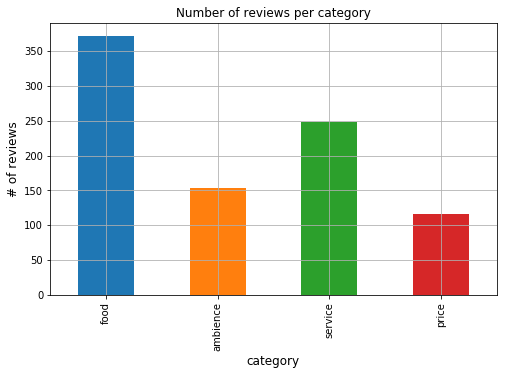

In [9]:
df_toxic = df.drop(['review_id', 'text','stars'], axis=1)
counts = []
categories = ['food', 'ambience', 'service', 'price']
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of reviews per category")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('category', fontsize=12)

In [10]:
df2.head()

,review_id,stars,text,food,ambience,service,price
0,yi0R0Ugj_xUx_Nek0-_Qig,5,went lunch steak sandwich delici caesar salad ...,1,0,1,1
1,fdiNeiN_hoCxCMy2wTRW9g,4,admit excit go tavolta food snob group friend ...,1,1,1,1
2,G7XHMxG0bx9oBJNECG4IFg,3,traci dessert big hong kong markham place year...,1,1,0,1
3,8e9HxxLjjqc9ez5ezzN7iQ,1,place gone hill clearli cut staff food qualiti...,1,0,1,1
4,kbtscdyz6lvrtGjD1quQTg,4,like walk time saturdai morn sister bowl leagu...,0,0,0,1


In [11]:
categories = ['food', 'ambience', 'service', 'price']
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.text
X_test = test.text
print(X_train.shape)
print(X_test.shape)

(261,)
(130,)


In [12]:
train2, test2 = train_test_split(df2, random_state=42, test_size=0.33, shuffle=True)
X_train2 = train2.text
X_test2 = test2.text
print(X_train2.shape)
print(X_test2.shape)

(261,)
(130,)


In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support



In [35]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    result = precision_recall_fscore_support(test[category], prediction, average='binary')
    print('Precision is {}, Recall is {}, f1_score is {}'.format(*result))

... Processing food
Test accuracy is 0.9615384615384616
Precision is 0.9615384615384616, Recall is 1.0, f1_score is 0.9803921568627451
... Processing ambience
Test accuracy is 0.6615384615384615
Precision is 0.75, Recall is 0.06521739130434782, f1_score is 0.12
... Processing service
Test accuracy is 0.6461538461538462
Precision is 0.6461538461538462, Recall is 1.0, f1_score is 0.7850467289719627
... Processing price
Test accuracy is 0.7076923076923077
Precision is 0.0, Recall is 0.0, f1_score is 0.0


/Users/CaptainQueer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    result = precision_recall_fscore_support(test[category], prediction, average='binary')
    print('Precision is {}, Recall is {}, f1_score is {}'.format(*result))

... Processing food
Test accuracy is 0.9615384615384616
Precision is 0.9615384615384616, Recall is 1.0, f1_score is 0.9803921568627451
... Processing ambience
Test accuracy is 0.6846153846153846
Precision is 0.5609756097560976, Recall is 0.5, f1_score is 0.5287356321839081
... Processing service
Test accuracy is 0.7076923076923077
Precision is 0.7129629629629629, Recall is 0.9166666666666666, f1_score is 0.8020833333333334
... Processing price
Test accuracy is 0.8076923076923077
Precision is 0.8823529411764706, Recall is 0.39473684210526316, f1_score is 0.5454545454545454


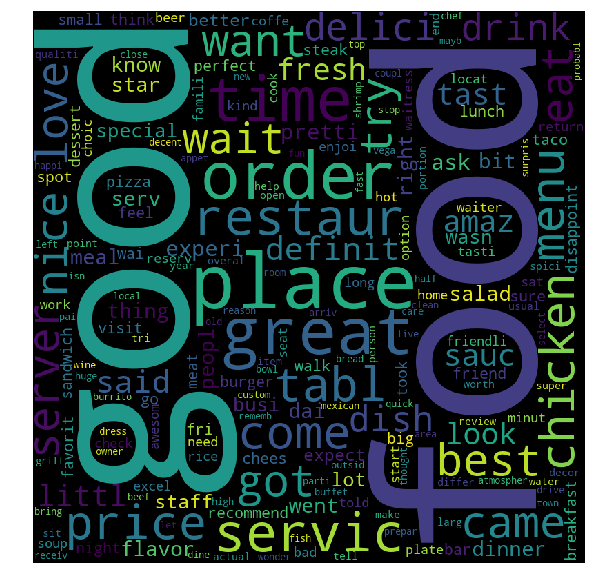

In [16]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
review = ''
for index, row in df2.iterrows():
    review = review + ',' + row['text']
    
plot_word_cloud(review)

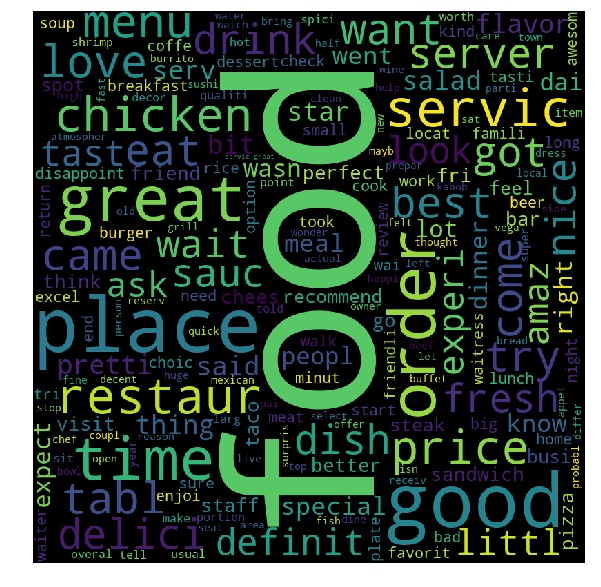

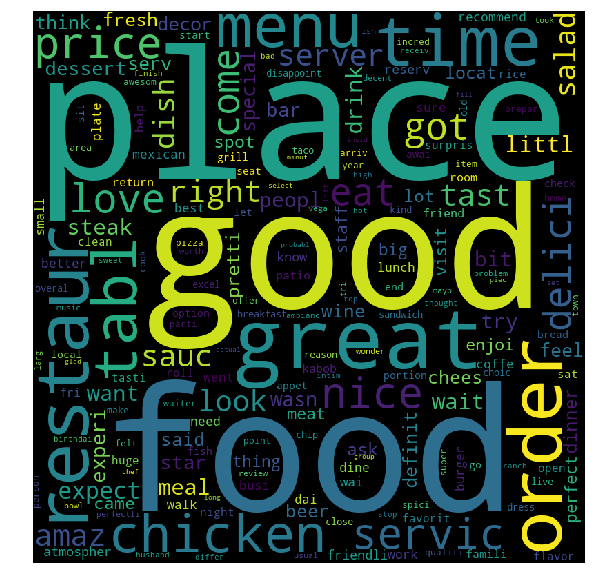

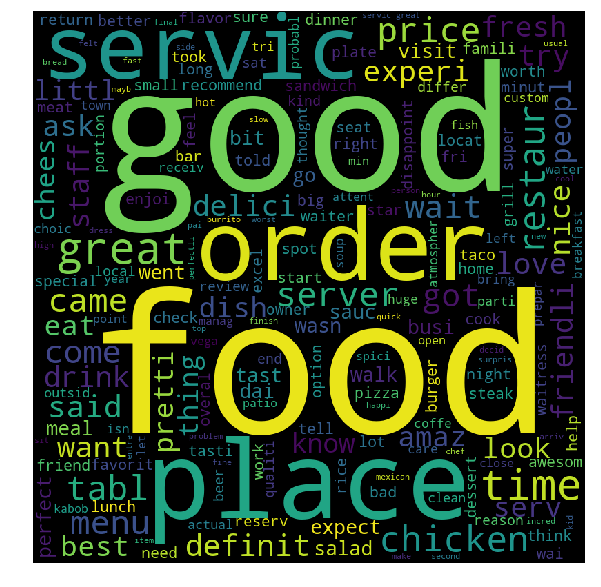

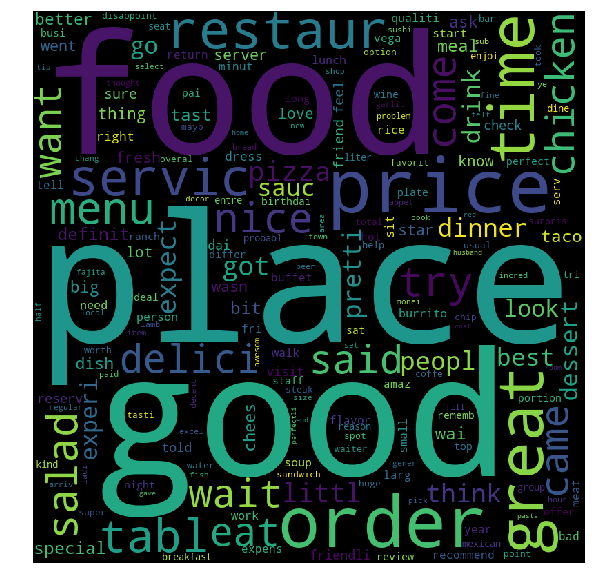

In [17]:
food = ""
for index, row in df2[df2.food == 1].iterrows():
    food = food + ',' + row['text']

ambience = ""
for index, row in df2[df2.ambience == 1].iterrows():
    ambience = ambience + ',' + row['text']

service = ""
for index, row in df2[df2.service == 1].iterrows():
    service = service + ',' + row['text']

price = ""
for index, row in df2[df2.price == 1].iterrows():
    price = price + ',' + row['text']
    
plot_word_cloud(food)
plot_word_cloud(ambience)
plot_word_cloud(service)
plot_word_cloud(price)

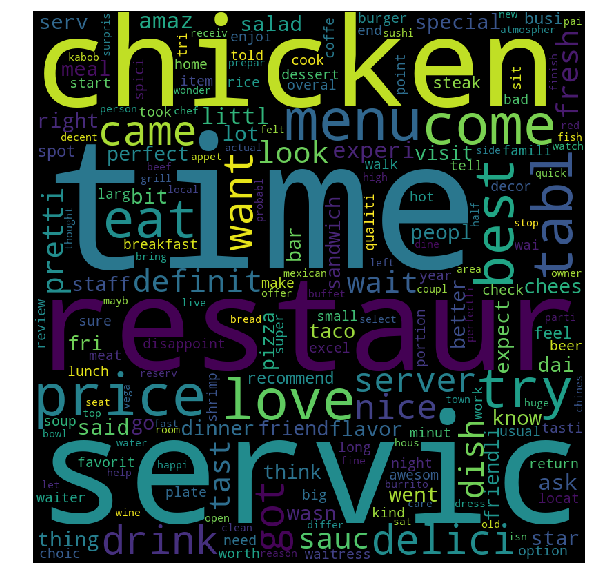

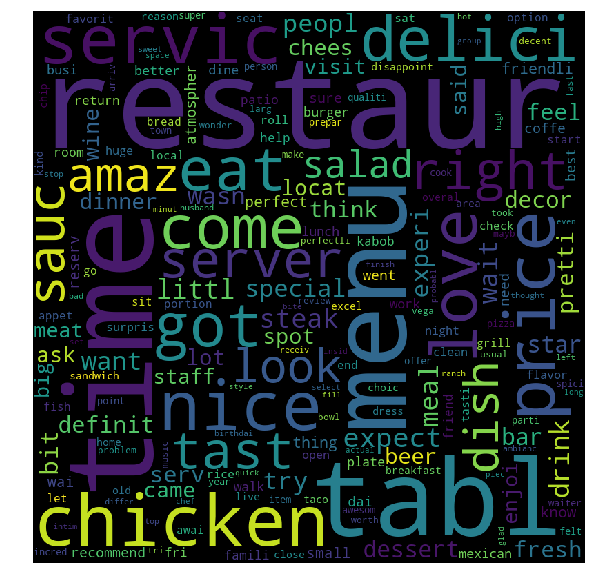

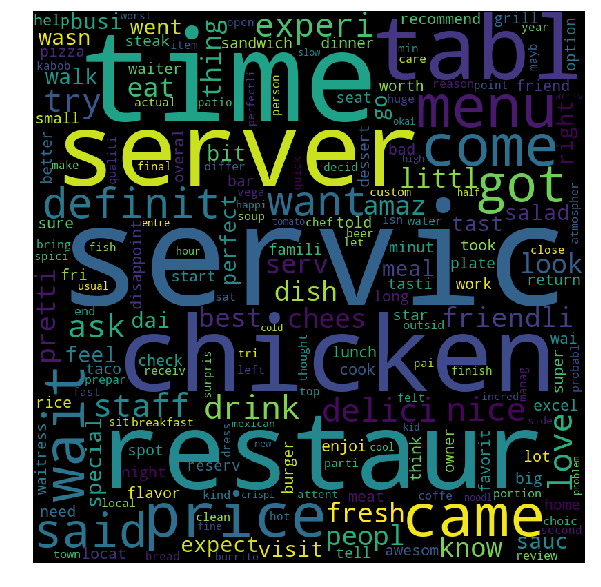

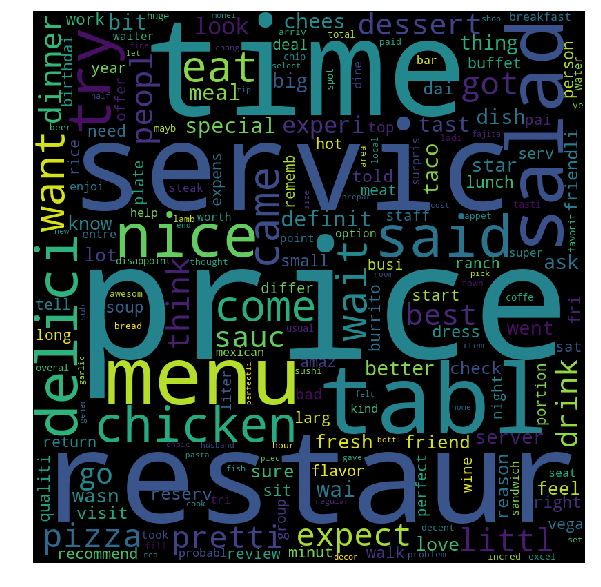

In [18]:
customized_stopwords = ["good","food","place", "great","resturant","order"]
food = ""
for index, row in df2[df2.food == 1].iterrows():
    food = food + ',' + ' '.join(filter(lambda x: x.lower() not in customized_stopwords,  row['text'].split()))

ambience = ""
for index, row in df2[df2.ambience == 1].iterrows():
    ambience = ambience + ',' + ' '.join(filter(lambda x: x.lower() not in customized_stopwords,  row['text'].split()))

service = ""
for index, row in df2[df2.service == 1].iterrows():
    service = service + ',' + ' '.join(filter(lambda x: x.lower() not in customized_stopwords,  row['text'].split()))

price = ""
for index, row in df2[df2.price == 1].iterrows():
    price = price + ',' + ' '.join(filter(lambda x: x.lower() not in customized_stopwords,  row['text'].split()))
    
plot_word_cloud(food)
plot_word_cloud(ambience)
plot_word_cloud(service)
plot_word_cloud(price)

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
df['ColumnA'] = df[df.columns[3:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [20]:
df

,review_id,stars,text,food,ambience,service,price,ColumnA
0,yi0R0Ugj_xUx_Nek0-_Qig,5,went in for a lunch steak sandwich was delicio...,1,0,1,1,"1,0,1,1"
1,fdiNeiN_hoCxCMy2wTRW9g,4,i will be the first to admit that i was not ex...,1,1,1,1,"1,1,1,1"
2,G7XHMxG0bx9oBJNECG4IFg,3,tracy dessert had a big name in hong kong and ...,1,1,0,1,"1,1,0,1"
3,8e9HxxLjjqc9ez5ezzN7iQ,1,this place has gone down hill clearly they hav...,1,0,1,1,"1,0,1,1"
4,kbtscdyz6lvrtGjD1quQTg,4,like walking back in time every saturday morni...,0,0,0,1,"0,0,0,1"
5,-I5umRTkhw15RqpKMl_o1Q,1,walked in around 4 on a friday afternoon we sa...,0,0,1,0,"0,0,1,0"
6,Z7wgXp98wYB57QdRY3HQ3w,4,wow so surprised at the one and two star revie...,1,1,1,1,"1,1,1,1"
7,JVcjMhlavKKn3UIt9p9OXA,1,i cannot believe how things have changed in 3 ...,1,0,1,0,"1,0,1,0"
8,svK3nBU7Rk8VfGorlrN52A,5,you can not really find anything wrong with th...,1,0,1,1,"1,0,1,1"
9,1wVA2-vQIuW_ClmXkDxqMQ,4,great lunch today staff was very helpful in as...,1,1,1,0,"1,1,1,0"


In [21]:
mlb = MultiLabelBinarizer()
encoded_y = mlb.fit_transform(df['ColumnA'])
encoded_y

array([[1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [22]:
train, test, y,ytest = train_test_split(df,encoded_y, random_state=42, test_size=0.33, shuffle=True)
X_train = train.text
X_test = test.text

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train)
xval_tfidf = tfidf_vectorizer.transform(X_test)
clf = OneVsRestClassifier(LinearSVC(), n_jobs=1)
y_pred = {}
#for category in categories:
clf.fit(xtrain_tfidf, y)
y_pred = clf.predict(xval_tfidf)
y_pred
#mlb.inverse_transform(y_pred)[0]

/Users/CaptainQueer/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 0 is present in all training examples.
  str(classes[c]))
/Users/CaptainQueer/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label 2 is present in all training examples.
  str(classes[c]))


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1,

In [24]:
df["text"][1]

'i will be the first to admit that i was not excited about going to la tavolta being a food snob when a group of friends suggested we go for dinner i looked online at the menu and to me there was nothing special and it seemed overpriced im also not big on ordering pasta when i go out alas i was outnumbered thank goodness i ordered the sea bass special it was to die for cooked perfectly seasoned perfectly perfect portion i can not say enough good things about this dish when the server asked how it was he seemed very proud of the dish and said does not she the chef do an incredible job she does my hubby got the crab tortellini and also loved his i heard mmmm this is so good from all around the table our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant service was very slow and the place was packed but we had our jugs of wine and a large group with good conversation so it did not seem to bother anyone so do order the calamari a

In [25]:
def infer_tags(q):
    q = clean_text(q)
    for category in categories:
        q_pred = SVC_pipeline.predict(q)
    return multilabel_binarizer.inverse_transform(q_pred)

In [26]:

#infer_tags(X_test)
